# Simple Linear Regression

* We can use gradients to do gradient descent to find the parameters of a simple linear model.

In [1]:
using Flux, Flux.Tracker
using Flux.Tracker: gradient, update!, data

using Plots

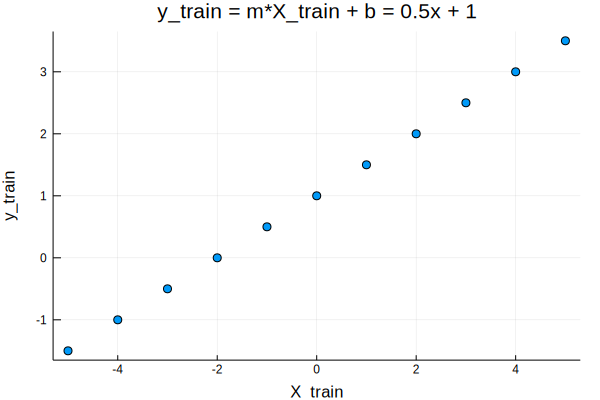

In [2]:
# Create some data.  We already know the parameters we're going to 
# try to find; the slope m is 0.5 and the y-intercept is 1.
# y = mx + b

X_train = collect(-5.:5.)
y_train = .5X_train .+ 1

scatter(X_train, y_train, xlabel="X_train", ylabel="y_train", title="y_train = m*X_train + b = 0.5x + 1", leg=false)

In [3]:
# Now, create some parameters for a linear model that we'll train to 
# match the data created above.

# We'll use a slope of 0.4 and a y intercep of 2; 
# pretty close to the originals of 0.5 and 1.

# We can tell Flux to treat an array as a parameter to be tracked with 
# the 'param' function.  After that, Flux will keep track of what operations
# have been performed on these variables.
m = param(Float64[.4])
b = param(Float64[2])


Tracked 1-element Array{Float64,1}:
 2.0

In [4]:
# Now define a very simple model, which uses the parameters 
# created above.
model(X) = m .* X .+ b


model (generic function with 1 method)

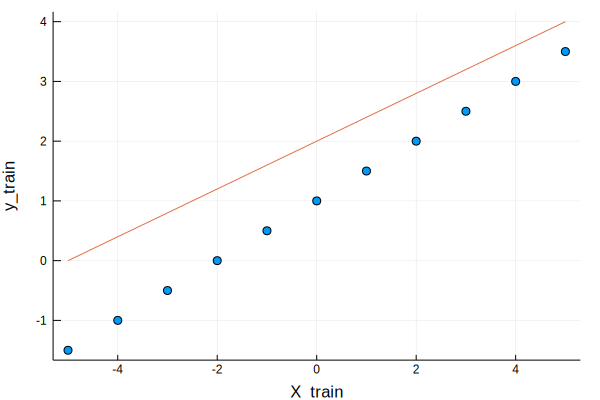

In [5]:
# How close is the model to the actual data right now?

scatter(X_train, y_train, xlabel="X_train", ylabel="y_train",leg=false)
plot!(X_train, data(model(X_train)), leg=false)

In [6]:
# To train the model we need a loss function.
# We can use mean squared error.  This is for demonstration, would normally use 
# Flux's mse function.

function loss(X, y)
  ŷ = model(X)
  sum((y .- ŷ).^2)
end


loss (generic function with 1 method)

# Train the Model

* Now train the model.
* Would normally use just the `train` function which would take an optimizer object.  The optimizer object would then update the parameters after each epoch/batch.  
* Using `gradient` and `update` here for demo purposes.


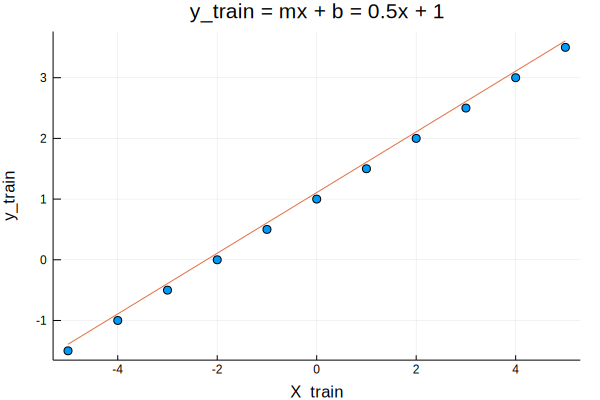

In [7]:
learning_rate = 0.001

for i in 1:100
    
    grads = gradient(
        () -> loss(X_train, y_train), # anonymous function that takes no arguments.
        Params([m, b])
    )

    # Update will update the parameter values and clear the gradients on 
    # the tracked objects (m and b).
    update!(m, -learning_rate .*grads[m])
    update!(b, -learning_rate .*grads[b])
    
    push!(losses, data(loss(X_train, y_train)))
end

scatter(X_train, y_train, xlabel="X_train", ylabel="y_train", title="y_train = mx + b = 0.5x + 1", leg=false)
plot!(X_train, data(model(X_train)), leg=false)

In [8]:
# After 100 iterations, the model is pretty close to the original data.
# The learned parameters are: 

data(m), data(b)

([0.5], [1.10811])

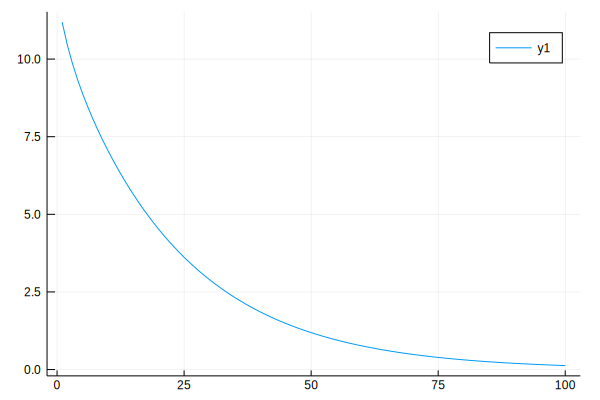

In [9]:
plot(losses)